**Online Transaction Fraud Detection Using Machine Learning Algorithms**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/fraud detection.csv")
df

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,QCWK.TO,LO,398,15,15,0,0,1,1,0,0,1,0,0,-34.680,9,9,49.95,49.95,LEGIT
29996,TCN.COM,TO,625,11,11,0,0,1,1,1,0,1,3,0,-39.976,16,0,38.85,38.85,LEGIT
29997,TTJQXQMF.EDU,ROK,655,22,22,0,0,1,0,0,0,1,2,0,50.632,20,0,12.95,12.95,LEGIT
29998,VUHZRNB.COM,KO,650,13,13,0,0,1,1,1,0,1,3,1,14.888,25,0,10.36,10.36,LEGIT


In [3]:
df.head()

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT


In [4]:
df.tail()

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
29995,QCWK.TO,LO,398,15,15,0,0,1,1,0,0,1,0,0,-34.680,9,9,49.95,49.95,LEGIT
29996,TCN.COM,TO,625,11,11,0,0,1,1,1,0,1,3,0,-39.976,16,0,38.85,38.85,LEGIT
29997,TTJQXQMF.EDU,ROK,655,22,22,0,0,1,0,0,0,1,2,0,50.632,20,0,12.95,12.95,LEGIT
29998,VUHZRNB.COM,KO,650,13,13,0,0,1,1,1,0,1,3,1,14.888,25,0,10.36,10.36,LEGIT
29999,NaN,NaN,XOSOP.COM,AO,675,0,0,0,0,0,0,1,3,1,58.936,26,0,12.95,12.95,LEGIT


In [5]:
df.shape

(30000, 20)

In [6]:
df['TRN_TYPE'].value_counts()

,count
TRN_TYPE,
LEGIT,29359
FRAUD,641


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         29999 non-null  object 
 1   STATE          29999 non-null  object 
 2   ZIPCODE        30000 non-null  object 
 3   TIME1          30000 non-null  object 
 4   TIME2          30000 non-null  int64  
 5   VIS1           30000 non-null  int64  
 6   VIS2           30000 non-null  int64  
 7   XRN1           30000 non-null  int64  
 8   XRN2           30000 non-null  int64  
 9   XRN3           30000 non-null  int64  
 10  XRN4           30000 non-null  int64  
 11  XRN5           30000 non-null  int64  
 12  VAR1           30000 non-null  int64  
 13  VAR2           30000 non-null  int64  
 14  VAR3           30000 non-null  float64
 15  VAR4           30000 non-null  int64  
 16  VAR5           30000 non-null  int64  
 17  TRN_AMT        30000 non-null  float64
 18  TOTAL_

In [8]:
df.describe()

,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,13.878333,0.113733,0.018333,0.549833,0.542000,0.402167,0.020067,6.197733,2.422100,0.424133,5.678951,13.987533,1.382700,25.579940,25.575989
std,6.499052,0.317492,0.134156,0.497519,0.498241,0.490343,0.140231,103.896596,0.998314,0.494219,31.521642,6.538038,2.442807,14.194685,14.198786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-258.120000,6.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,-12.376000,8.000000,0.000000,12.950000,12.950000
50%,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,11.712000,12.000000,0.000000,24.950000,24.950000
75%,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,28.856000,19.000000,2.000000,38.850000,38.850000
max,675.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.000000,4.000000,1.000000,65.184000,46.000000,26.000000,95.400000,95.400000


In [9]:
df['TRN_TYPE'].unique()



array(['LEGIT', 'FRAUD'], dtype=object)

In [10]:
df.drop(columns=["ZIPCODE","TIME1"],inplace=True)
df

,DOMAIN,STATE,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,QCWK.TO,LO,15,0,0,1,1,0,0,1,0,0,-34.680,9,9,49.95,49.95,LEGIT
29996,TCN.COM,TO,11,0,0,1,1,1,0,1,3,0,-39.976,16,0,38.85,38.85,LEGIT
29997,TTJQXQMF.EDU,ROK,22,0,0,1,0,0,0,1,2,0,50.632,20,0,12.95,12.95,LEGIT
29998,VUHZRNB.COM,KO,13,0,0,1,1,1,0,1,3,1,14.888,25,0,10.36,10.36,LEGIT


In [11]:
df['VAR3']=df['VAR3'].round().astype(int)
df

,DOMAIN,STATE,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,12,1,0,0,1,1,0,1,2,1,17,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,18,1,0,0,0,0,0,1,3,0,38,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,3,1,0,0,1,1,0,1,3,1,-9,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,23,0,0,1,0,0,0,3,0,0,-6,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,9,0,0,0,1,0,0,1,3,0,43,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,QCWK.TO,LO,15,0,0,1,1,0,0,1,0,0,-35,9,9,49.95,49.95,LEGIT
29996,TCN.COM,TO,11,0,0,1,1,1,0,1,3,0,-40,16,0,38.85,38.85,LEGIT
29997,TTJQXQMF.EDU,ROK,22,0,0,1,0,0,0,1,2,0,51,20,0,12.95,12.95,LEGIT
29998,VUHZRNB.COM,KO,13,0,0,1,1,1,0,1,3,1,15,25,0,10.36,10.36,LEGIT


In [12]:
df['TRN_AMT']=df['TRN_AMT'].round().astype(int)
df

,DOMAIN,STATE,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,12,1,0,0,1,1,0,1,2,1,17,34,0,13,12.95,LEGIT
1,NEKSXUK.NET,KK,18,1,0,0,0,0,0,1,3,0,38,23,0,39,38.85,LEGIT
2,XOSOP.COM,UO,3,1,0,0,1,1,0,1,3,1,-9,19,2,39,38.85,LEGIT
3,TMA.COM,KR,23,0,0,1,0,0,0,3,0,0,-6,18,0,11,11.01,LEGIT
4,VUHZRNB.COM,PO,9,0,0,0,1,0,0,1,3,0,43,7,0,13,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,QCWK.TO,LO,15,0,0,1,1,0,0,1,0,0,-35,9,9,50,49.95,LEGIT
29996,TCN.COM,TO,11,0,0,1,1,1,0,1,3,0,-40,16,0,39,38.85,LEGIT
29997,TTJQXQMF.EDU,ROK,22,0,0,1,0,0,0,1,2,0,51,20,0,13,12.95,LEGIT
29998,VUHZRNB.COM,KO,13,0,0,1,1,1,0,1,3,1,15,25,0,10,10.36,LEGIT


In [13]:
df["TOTAL_TRN_AMT"]=df["TOTAL_TRN_AMT"].round().astype(int)
df

,DOMAIN,STATE,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,12,1,0,0,1,1,0,1,2,1,17,34,0,13,13,LEGIT
1,NEKSXUK.NET,KK,18,1,0,0,0,0,0,1,3,0,38,23,0,39,39,LEGIT
2,XOSOP.COM,UO,3,1,0,0,1,1,0,1,3,1,-9,19,2,39,39,LEGIT
3,TMA.COM,KR,23,0,0,1,0,0,0,3,0,0,-6,18,0,11,11,LEGIT
4,VUHZRNB.COM,PO,9,0,0,0,1,0,0,1,3,0,43,7,0,13,13,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,QCWK.TO,LO,15,0,0,1,1,0,0,1,0,0,-35,9,9,50,50,LEGIT
29996,TCN.COM,TO,11,0,0,1,1,1,0,1,3,0,-40,16,0,39,39,LEGIT
29997,TTJQXQMF.EDU,ROK,22,0,0,1,0,0,0,1,2,0,51,20,0,13,13,LEGIT
29998,VUHZRNB.COM,KO,13,0,0,1,1,1,0,1,3,1,15,25,0,10,10,LEGIT


In [14]:
df.isna()

,DOMAIN,STATE,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().sum()

,0
DOMAIN,1
STATE,1
TIME2,0
VIS1,0
VIS2,0
XRN1,0
XRN2,0
XRN3,0
XRN4,0
XRN5,0


In [16]:
df.dtypes

,0
DOMAIN,object
STATE,object
TIME2,int64
VIS1,int64
VIS2,int64
XRN1,int64
XRN2,int64
XRN3,int64
XRN4,int64
XRN5,int64


Handling missing values

*   Categorical-mode
*   Numrical-median



In [17]:
df["DOMAIN"].fillna(df["DOMAIN"].mode(),inplace=True)
df

/tmp/ipython-input-1708783389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DOMAIN"].fillna(df["DOMAIN"].mode(),inplace=True)


,DOMAIN,STATE,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,12,1,0,0,1,1,0,1,2,1,17,34,0,13,13,LEGIT
1,NEKSXUK.NET,KK,18,1,0,0,0,0,0,1,3,0,38,23,0,39,39,LEGIT
2,XOSOP.COM,UO,3,1,0,0,1,1,0,1,3,1,-9,19,2,39,39,LEGIT
3,TMA.COM,KR,23,0,0,1,0,0,0,3,0,0,-6,18,0,11,11,LEGIT
4,VUHZRNB.COM,PO,9,0,0,0,1,0,0,1,3,0,43,7,0,13,13,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,QCWK.TO,LO,15,0,0,1,1,0,0,1,0,0,-35,9,9,50,50,LEGIT
29996,TCN.COM,TO,11,0,0,1,1,1,0,1,3,0,-40,16,0,39,39,LEGIT
29997,TTJQXQMF.EDU,ROK,22,0,0,1,0,0,0,1,2,0,51,20,0,13,13,LEGIT
29998,VUHZRNB.COM,KO,13,0,0,1,1,1,0,1,3,1,15,25,0,10,10,LEGIT


In [18]:
df["STATE"].fillna(df["STATE"].mode(),inplace=True)
df

/tmp/ipython-input-3773422091.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["STATE"].fillna(df["STATE"].mode(),inplace=True)


,DOMAIN,STATE,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,12,1,0,0,1,1,0,1,2,1,17,34,0,13,13,LEGIT
1,NEKSXUK.NET,KK,18,1,0,0,0,0,0,1,3,0,38,23,0,39,39,LEGIT
2,XOSOP.COM,UO,3,1,0,0,1,1,0,1,3,1,-9,19,2,39,39,LEGIT
3,TMA.COM,KR,23,0,0,1,0,0,0,3,0,0,-6,18,0,11,11,LEGIT
4,VUHZRNB.COM,PO,9,0,0,0,1,0,0,1,3,0,43,7,0,13,13,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,QCWK.TO,LO,15,0,0,1,1,0,0,1,0,0,-35,9,9,50,50,LEGIT
29996,TCN.COM,TO,11,0,0,1,1,1,0,1,3,0,-40,16,0,39,39,LEGIT
29997,TTJQXQMF.EDU,ROK,22,0,0,1,0,0,0,1,2,0,51,20,0,13,13,LEGIT
29998,VUHZRNB.COM,KO,13,0,0,1,1,1,0,1,3,1,15,25,0,10,10,LEGIT


In [19]:
df.isna().sum()

,0
DOMAIN,1
STATE,1
TIME2,0
VIS1,0
VIS2,0
XRN1,0
XRN2,0
XRN3,0
XRN4,0
XRN5,0


Encoding

In [20]:
l=LabelEncoder()
df['DOMAIN']=l.fit_transform(df['DOMAIN'])
df['DOMAIN'].head()

,DOMAIN
0,382
1,2348
2,4187
3,3478
4,3885


In [21]:
l=LabelEncoder()
df['STATE']=l.fit_transform(df['STATE'])
df['STATE'].head()


,STATE
0,3
1,15
2,47
3,17
4,28


In [22]:
df

,DOMAIN,STATE,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,382,3,12,1,0,0,1,1,0,1,2,1,17,34,0,13,13,LEGIT
1,2348,15,18,1,0,0,0,0,0,1,3,0,38,23,0,39,39,LEGIT
2,4187,47,3,1,0,0,1,1,0,1,3,1,-9,19,2,39,39,LEGIT
3,3478,17,23,0,0,1,0,0,0,3,0,0,-6,18,0,11,11,LEGIT
4,3885,28,9,0,0,0,1,0,0,1,3,0,43,7,0,13,13,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2878,19,15,0,0,1,1,0,0,1,0,0,-35,9,9,50,50,LEGIT
29996,3407,44,11,0,0,1,1,1,0,1,3,0,-40,16,0,39,39,LEGIT
29997,3526,34,22,0,0,1,0,0,0,1,2,0,51,20,0,13,13,LEGIT
29998,3885,16,13,0,0,1,1,1,0,1,3,1,15,25,0,10,10,LEGIT


In [23]:
df['TRN_TYPE'].value_counts()

,count
TRN_TYPE,
LEGIT,29359
FRAUD,641


Train-Split-Test

In [24]:
x=df.drop(columns=["TRN_TYPE"]).values
x

array([[ 382,    3,   12, ...,    0,   13,   13],
       [2348,   15,   18, ...,    0,   39,   39],
       [4187,   47,    3, ...,    2,   39,   39],
       ...,
       [3526,   34,   22, ...,    0,   13,   13],
       [3885,   16,   13, ...,    0,   10,   10],
       [4593,   52,  675, ...,    0,   13,   13]])

In [25]:
y=df["TRN_TYPE"].values
y

array(['LEGIT', 'LEGIT', 'LEGIT', ..., 'LEGIT', 'LEGIT', 'LEGIT'],
      dtype=object)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
x_train

array([[4405,   28,   18, ...,    5,   39,   39],
       [4187,    8,   10, ...,    4,   13,   13],
       [3885,   17,   13, ...,    0,   13,   13],
       ...,
       [3809,    0,   10, ...,    0,   31,   31],
       [3992,   28,   10, ...,    9,   50,   50],
       [3478,   17,    9, ...,    0,   13,   13]])

In [30]:
y_train

array(['LEGIT', 'LEGIT', 'LEGIT', ..., 'LEGIT', 'LEGIT', 'LEGIT'],
      dtype=object)

Scaling

In [31]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [32]:
x_test

array([[ 0.89340077, -0.72093105,  0.91825529, ...,  1.89645546,
         0.91916303,  0.91934196],
       [ 0.65807249,  0.36269728, -0.7920712 , ..., -0.57092425,
        -0.90194808, -0.90152239],
       [ 0.65807249,  1.91073776, -0.67804944, ..., -0.57092425,
        -1.11207629, -1.11162213],
       ...,
       [ 0.18897441, -0.33392093,  0.00608116, ..., -0.57092425,
        -0.90194808, -0.90152239],
       [ 0.34092478, -0.48872498, -1.59022357, ..., -0.57092425,
        -0.90194808, -0.90152239],
       [ 0.34092478, -0.566127  ,  0.23412469, ..., -0.57092425,
         0.00860747,  0.00890978]])

In [33]:
x_train

array([[ 1.06717039,  0.36507723,  0.79343215, ...,  1.4789573 ,
         0.9470871 ,  0.94701952],
       [ 0.89696091, -1.19945966, -0.73572468, ...,  1.07037331,
        -0.87947099, -0.87889228],
       [ 0.66116613, -0.49541806, -0.16229087, ..., -0.56396264,
        -0.87947099, -0.87889228],
       ...,
       [ 0.60182704, -1.82527442, -0.73572468, ..., -0.56396264,
         0.38506922,  0.38520051],
       [ 0.74470931,  0.36507723, -0.73572468, ...,  3.11329326,
         1.71986167,  1.71952066],
       [ 0.34338971, -0.49541806, -0.92686929, ..., -0.56396264,
        -0.87947099, -0.87889228]])

Train model and Prediction

In [34]:
from sklearn.neighbors import KNeighborsClassifier
k_model=KNeighborsClassifier(n_neighbors=3)
k_model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [35]:
from sklearn.naive_bayes import GaussianNB
n_model=GaussianNB()
n_model.fit(x_train,y_train)

GaussianNB()

In [36]:
from sklearn.svm import SVC
s_model=SVC()
s_model.fit(x_train,y_train)

SVC()

In [37]:
from sklearn.linear_model import LogisticRegression
l_model=LogisticRegression()
l_model.fit(x_train,y_train)

LogisticRegression()

In [38]:
from sklearn.ensemble import RandomForestClassifier
r_model=RandomForestClassifier(n_estimators=200,class_weight="balanced",random_state=42)
r_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier
t_model=DecisionTreeClassifier()
t_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
models=[k_model,n_model,s_model,l_model,r_model,t_model]

In [41]:
modelss=[]
scores=[]
for model in models:
  y_pred=model.predict(x_test)
  score=accuracy_score(y_test,y_pred)
  print(model,"accuracy",score*100)
  print("*"*50)
  modelss.append(model.__class__.__name__)
  scores.append(score)


KNeighborsClassifier(n_neighbors=3) accuracy 97.36666666666667
**************************************************
GaussianNB() accuracy 97.4888888888889
**************************************************
SVC() accuracy 97.4888888888889
**************************************************
LogisticRegression() accuracy 97.4888888888889
**************************************************
RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42) accuracy 97.46666666666667
**************************************************
DecisionTreeClassifier() accuracy 94.94444444444444
**************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

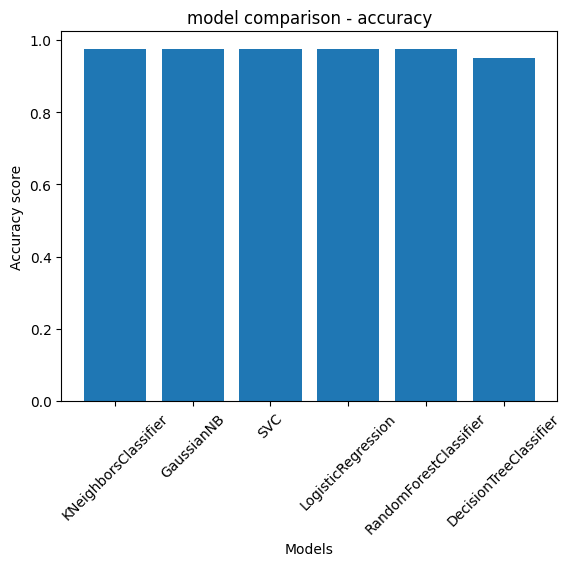

In [42]:
# plot bar chart

plt.bar(modelss,scores)
plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.title("model comparison - accuracy")
plt.xticks(rotation=45)
plt.show

Most Accurate Model is RandomForestClassifier

In [43]:
y_pred=r_model.predict(x_test)
y_pred

array(['LEGIT', 'LEGIT', 'LEGIT', ..., 'LEGIT', 'LEGIT', 'LEGIT'],
      dtype=object)

In [44]:
ap=pd.DataFrame({"actual_value":y_test,"predicted_value":y_pred})
ap

,actual_value,predicted_value
0,LEGIT,LEGIT
1,LEGIT,LEGIT
2,LEGIT,LEGIT
3,LEGIT,LEGIT
4,LEGIT,LEGIT
...,...,...
8995,LEGIT,LEGIT
8996,LEGIT,LEGIT
8997,LEGIT,LEGIT
8998,LEGIT,LEGIT


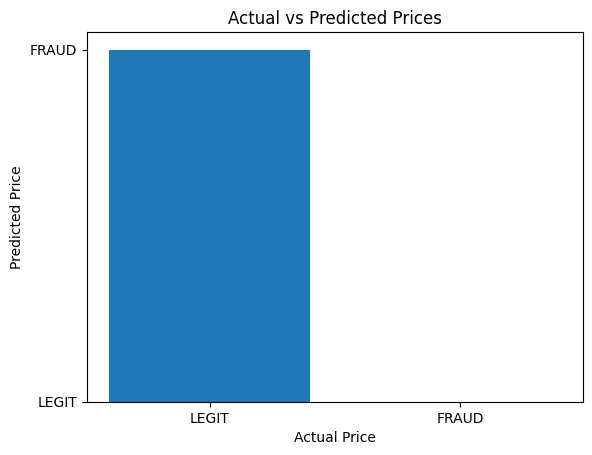

In [45]:
plt.bar(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

Evaluation

In [46]:
a=accuracy_score(y_test,y_pred)
print("Accuracy Score:",a*100,"%")


Accuracy Score: 97.46666666666667 %


In [47]:
c=confusion_matrix(y_test,y_pred)
print("confusion matrix:",c)

confusion matrix: [[   0  226]
 [   2 8772]]


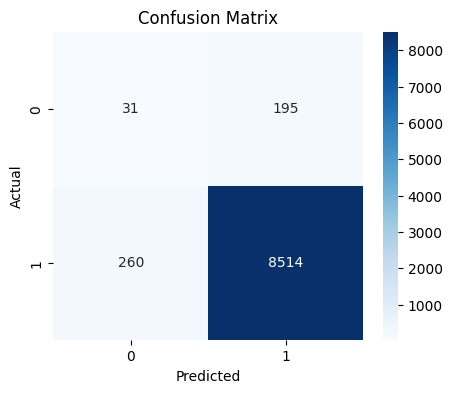

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
c= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(c, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Prediction

In [49]:
sample1=[[4593,52,675,0,0,0,0,0,0,1,3,1,59,26,0,13,13]]
prediction1=r_model.predict(sample1)
print("Predicted class",prediction1)

Predicted class ['LEGIT']


In [50]:
sample2= [[500,19,350,1,1,1,0,0,1,0,12,1,15,1,1,0,3]]
prediction2=r_model.predict(sample2)
print("Predicted class",prediction2)


Predicted class ['LEGIT']
